In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [4]:
%cd  /gdrive/MyDrive/364/'KNN Comp'/
%ls

/gdrive/MyDrive/364/KNN Comp
'Copy of Exploration.ipynb'   KNN-sample-target.csv
'Copy of LogReg-data.csv'     KNN-TestingSubmission.py
 KNN-data.csv                ' Model Testing and Selection.ipynb'
 KNN-sample-features.csv      process.py


In [5]:
df = pd.read_csv('KNN-data.csv')
df # data has many different scales, should standardize / normalize the variables

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,y
0,9.4,0.56,7.4,3.51,11.0,0.00,0.70,0.076,0.99780,1.9,34.0,1
1,9.8,0.68,7.8,3.20,25.0,0.00,0.88,0.098,0.99680,2.6,67.0,1
2,9.8,0.65,7.8,3.26,15.0,0.04,0.76,0.092,0.99700,2.3,54.0,1
3,9.8,0.58,11.2,3.16,17.0,0.56,0.28,0.075,0.99800,1.9,60.0,0
4,9.4,0.56,7.4,3.51,11.0,0.00,0.70,0.076,0.99780,1.9,34.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1014,10.9,0.61,7.1,3.40,24.0,0.01,0.60,0.079,0.99514,2.3,37.0,0
1015,10.9,0.61,7.1,3.40,24.0,0.01,0.60,0.079,0.99514,2.3,37.0,0
1016,9.8,0.59,7.5,3.28,27.0,0.14,0.58,0.077,0.99630,2.2,60.0,1
1017,9.8,0.58,7.1,3.45,6.0,0.00,0.72,0.123,0.99627,1.8,14.0,1


# Exploration

In [7]:
df.head(20)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,y
0,9.4,0.56,7.4,3.51,11.0,0.00,0.700,0.076,0.9978,1.9,34.0,1
1,9.8,0.68,7.8,3.20,25.0,0.00,0.880,0.098,0.9968,2.6,67.0,1
2,9.8,0.65,7.8,3.26,15.0,0.04,0.760,0.092,0.9970,2.3,54.0,1
3,9.8,0.58,11.2,3.16,17.0,0.56,0.280,0.075,0.9980,1.9,60.0,0
4,9.4,0.56,7.4,3.51,11.0,0.00,0.700,0.076,0.9978,1.9,34.0,1
5,9.4,0.56,7.4,3.51,13.0,0.00,0.660,0.075,0.9978,1.8,40.0,1
6,9.4,0.46,7.9,3.30,15.0,0.06,0.600,0.069,0.9964,1.6,59.0,1
7,10.5,0.80,7.5,3.35,17.0,0.36,0.500,0.071,0.9978,6.1,102.0,1
8,9.2,0.54,6.7,3.28,15.0,0.08,0.580,0.097,0.9959,1.8,65.0,1
9,10.5,0.80,7.5,3.35,17.0,0.36,0.500,0.071,0.9978,6.1,102.0,1


In [8]:
df.shape

(1019, 12)

In [9]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,y
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,10.186654,0.652659,8.526595,3.299156,15.823356,0.276506,0.531079,0.090483,0.997163,2.514279,49.470069,0.521099
std,0.974497,0.172642,1.711601,0.151873,10.296045,0.188620,0.169465,0.047722,0.001771,1.263135,33.482744,0.499800
min,8.400000,0.390000,4.700000,2.860000,1.000000,0.000000,0.180000,0.034000,0.990070,0.900000,6.000000,0.000000
25%,9.500000,0.550000,7.300000,3.200000,7.000000,0.120000,0.400000,0.073000,0.996200,1.900000,23.000000,0.000000
50%,9.900000,0.610000,8.200000,3.300000,14.000000,0.260000,0.520000,0.081000,0.997100,2.200000,40.000000,1.000000
75%,10.800000,0.710000,9.400000,3.400000,21.000000,0.430000,0.635000,0.092000,0.998200,2.600000,66.000000,1.000000
max,14.900000,1.980000,15.900000,3.900000,72.000000,0.790000,1.330000,0.611000,1.003150,15.500000,165.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      1019 non-null   float64
 1   A2      1019 non-null   float64
 2   A3      1019 non-null   float64
 3   A4      1019 non-null   float64
 4   A5      1019 non-null   float64
 5   A6      1019 non-null   float64
 6   A7      1019 non-null   float64
 7   A8      1019 non-null   float64
 8   A9      1019 non-null   float64
 9   A10     1019 non-null   float64
 10  A11     1019 non-null   float64
 11  y       1019 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 95.7 KB


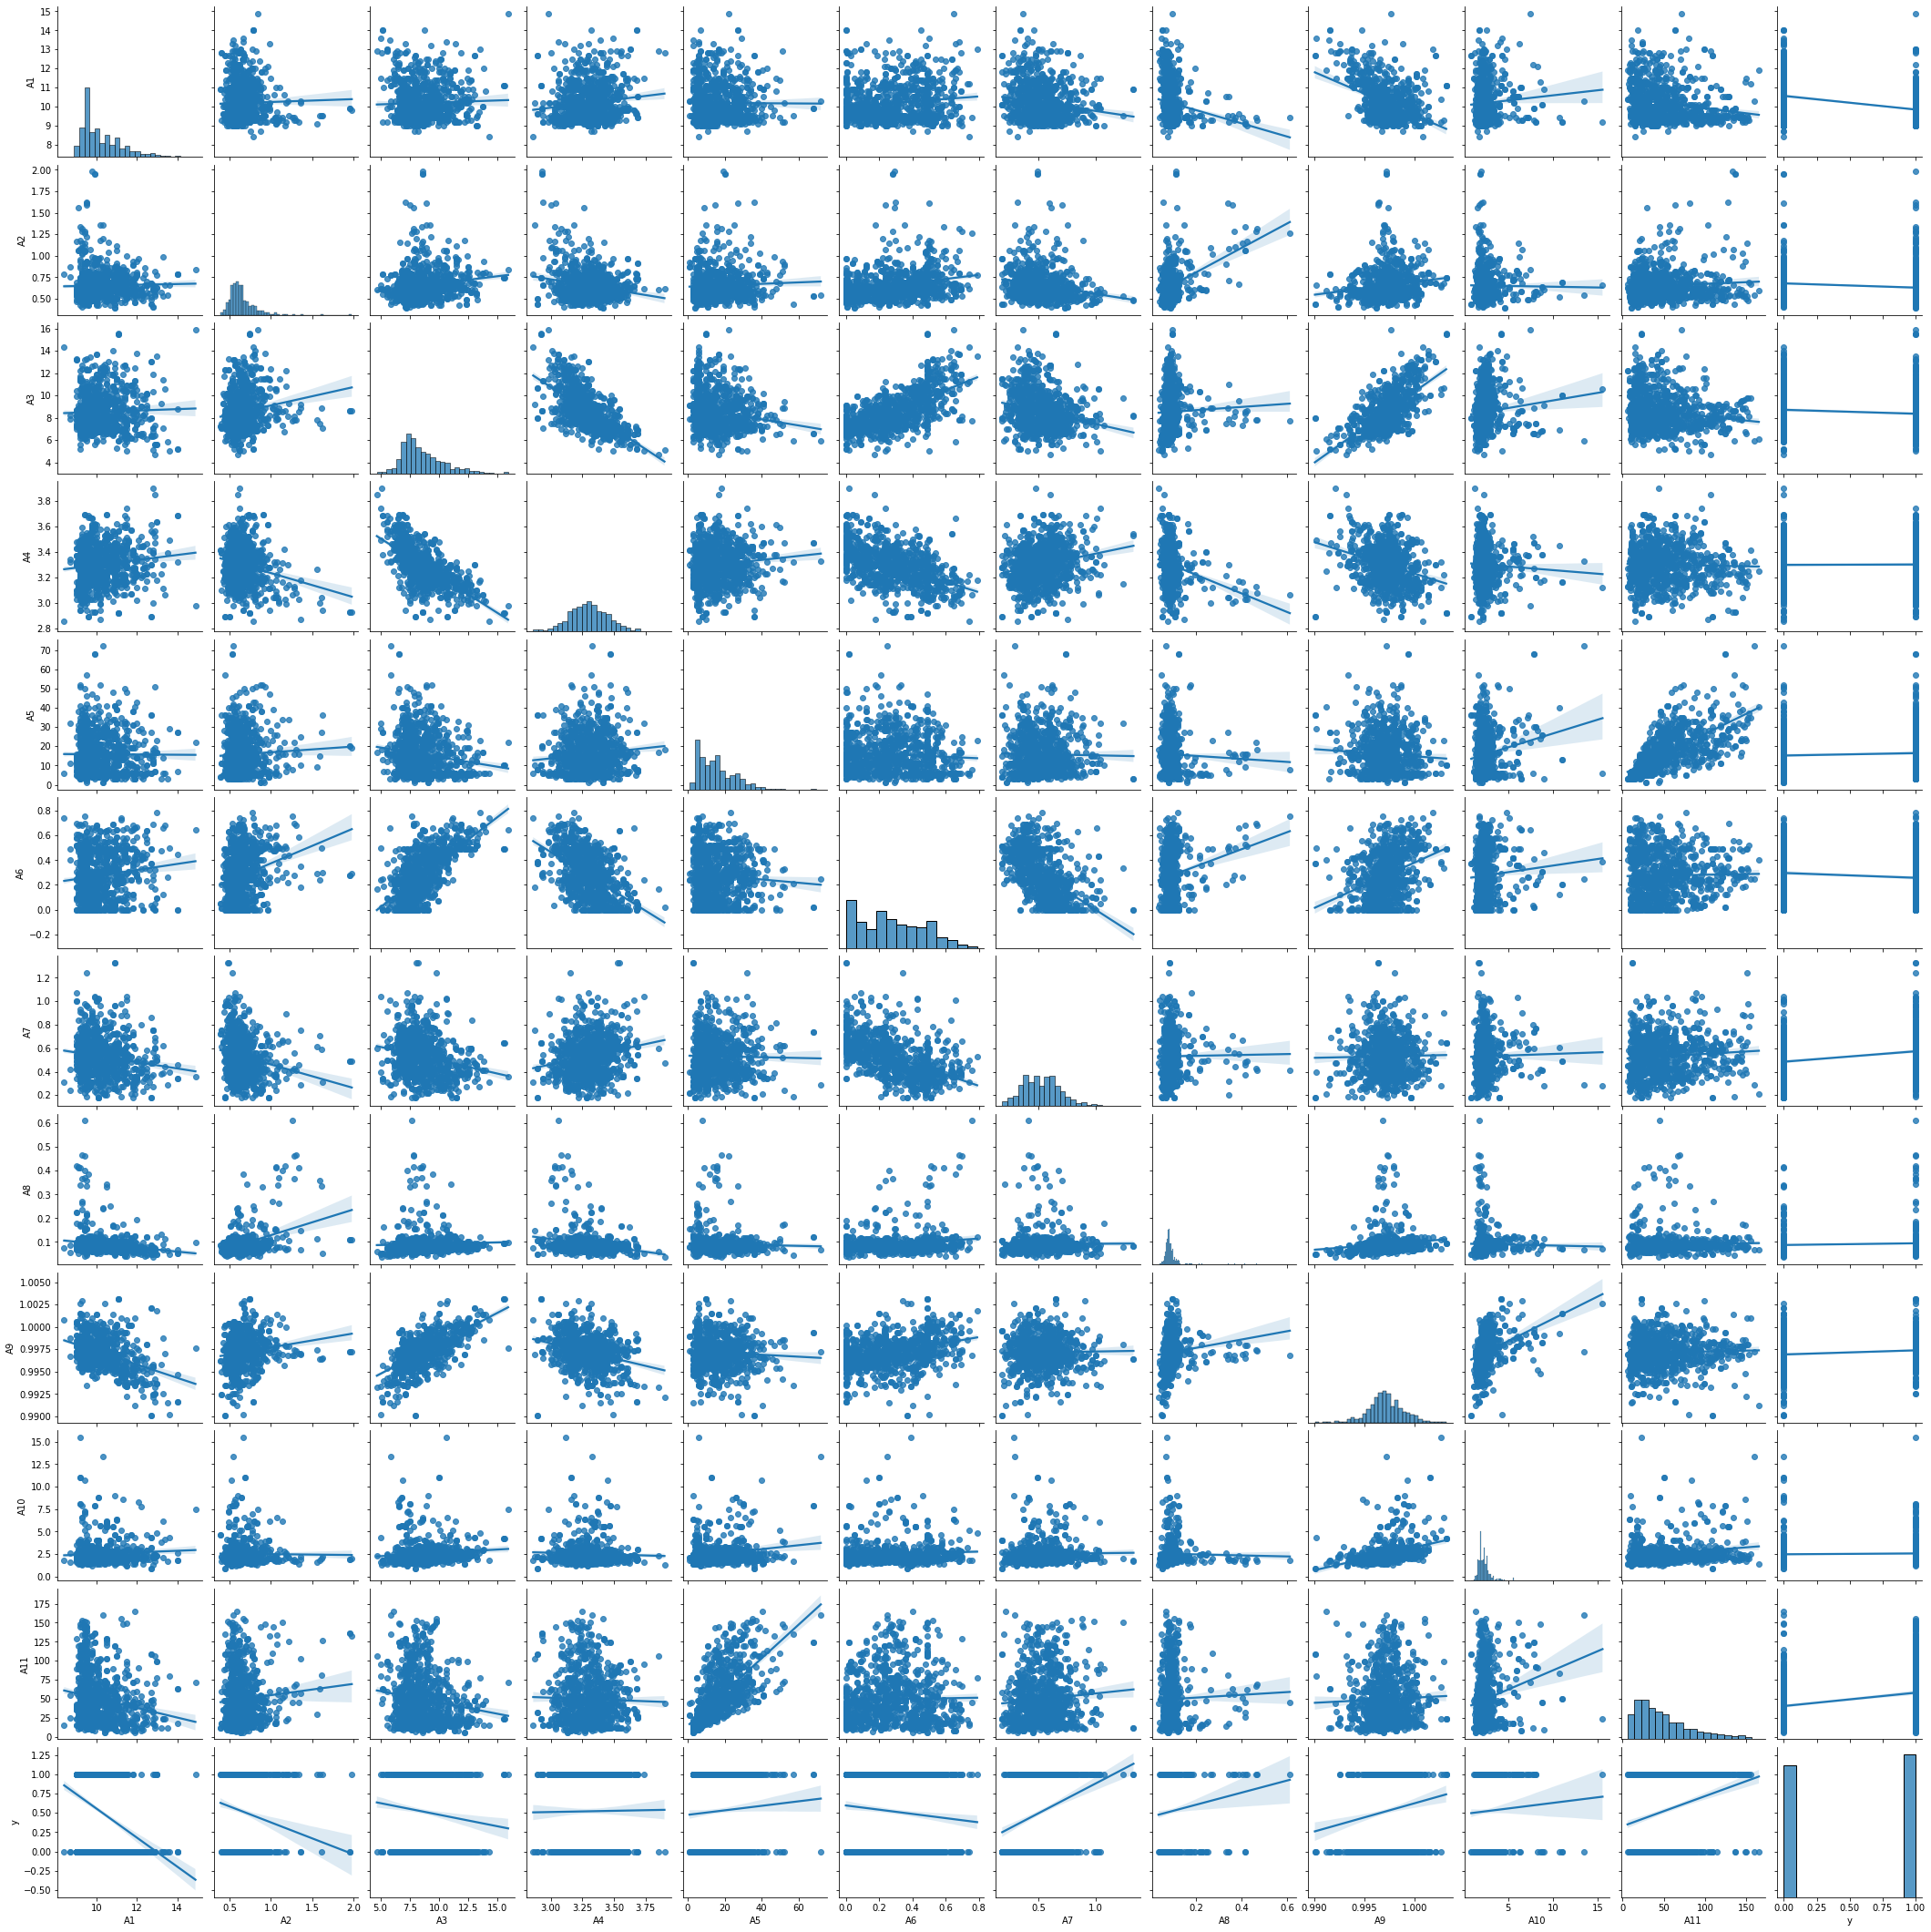

In [11]:
sns.pairplot(df, kind='reg')

In [18]:
# let's take a look at the percentage of zeros: 
df.isin([0]).sum()/df.shape[0]*100 

# only A6 has some zeros

A1      0.000000
A2      0.000000
A3      0.000000
A4      0.000000
A5      0.000000
A6      7.752699
A7      0.000000
A8      0.000000
A9      0.000000
A10     0.000000
A11     0.000000
y      47.890088
dtype: float64

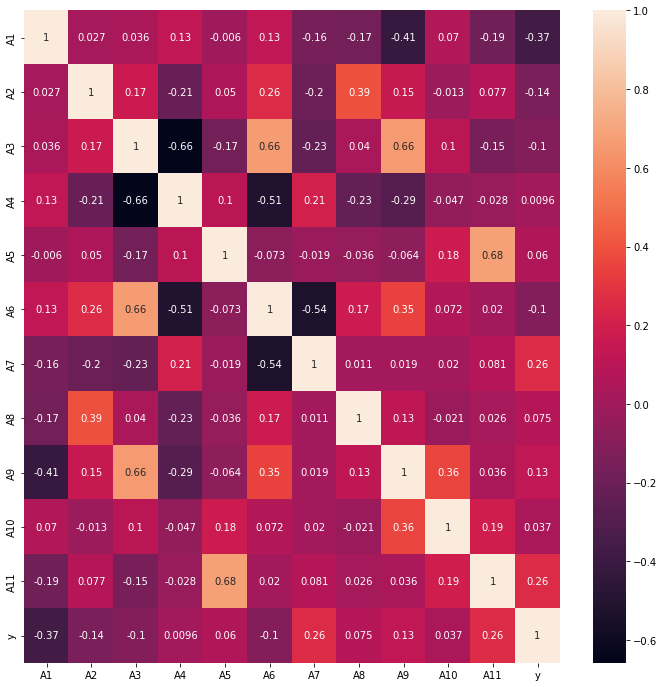

In [19]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 12, 12


sns.heatmap(df.corr(), annot=True)


In [14]:
df.isnull().any()

A1     False
A2     False
A3     False
A4     False
A5     False
A6     False
A7     False
A8     False
A9     False
A10    False
A11    False
y      False
dtype: bool

In [15]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,y
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,10.186654,0.652659,8.526595,3.299156,15.823356,0.276506,0.531079,0.090483,0.997163,2.514279,49.470069,0.521099
std,0.974497,0.172642,1.711601,0.151873,10.296045,0.188620,0.169465,0.047722,0.001771,1.263135,33.482744,0.499800
min,8.400000,0.390000,4.700000,2.860000,1.000000,0.000000,0.180000,0.034000,0.990070,0.900000,6.000000,0.000000
25%,9.500000,0.550000,7.300000,3.200000,7.000000,0.120000,0.400000,0.073000,0.996200,1.900000,23.000000,0.000000
50%,9.900000,0.610000,8.200000,3.300000,14.000000,0.260000,0.520000,0.081000,0.997100,2.200000,40.000000,1.000000
75%,10.800000,0.710000,9.400000,3.400000,21.000000,0.430000,0.635000,0.092000,0.998200,2.600000,66.000000,1.000000
max,14.900000,1.980000,15.900000,3.900000,72.000000,0.790000,1.330000,0.611000,1.003150,15.500000,165.000000,1.000000


In [16]:
for col in df.columns:
  print(df[col].value_counts())

9.5     120
9.4      96
9.2      57
9.8      55
9.3      53
10.0     49
10.5     44
9.6      42
9.7      35
10.2     30
10.1     29
10.9     28
11.0     28
9.9      28
10.4     27
9.0      22
10.8     22
10.3     21
10.7     21
9.1      20
11.4     18
11.5     18
11.2     16
11.1     15
11.3     15
11.8     13
12.0     10
10.6     10
11.9      9
12.8      7
12.5      6
12.7      6
11.7      6
12.2      6
12.9      5
11.6      5
12.3      5
12.4      3
14.0      3
13.0      3
13.3      2
8.7       2
12.1      2
13.6      1
12.6      1
13.4      1
13.2      1
14.9      1
8.4       1
13.5      1
Name: A1, dtype: int64
0.58    45
0.60    45
0.54    44
0.62    43
0.57    42
        ..
1.04     1
1.61     1
1.09     1
1.26     1
1.31     1
Name: A2, Length: 88, dtype: int64
7.1     40
7.7     39
7.8     38
7.2     35
7.0     31
        ..
12.8     1
13.4     1
14.0     1
13.5     1
5.3      1
Name: A3, Length: 90, dtype: int64
3.28    34
3.30    30
3.39    30
3.32    29
3.22    29
        ..